# Theory:

<hr>

<p> 
    <font color="tomato">
        Volume Weighted Average Price [VWAP]:
    </font>
    <br>
    
    It a technique used by stock traders to reduce the noise and find out the actual trends, 
    considering factors such as Volume and Rate.
</p>


<p> 
    <font color="tomato">
        Linear Regression (LR):
    </font>
    <br>
            LR
    
</p>

## Dataset:
<hr>

<p>
    Dataset collected from National Stock Exchange [NSE].<br>
    Link: https://www.nseindia.com/products/content/equities/equities/eq_security.htm
    
    Companies:
        - Biocon
        - Britannia
        - Coal India
        - Eicher Motors
        - Heidelberg
        - ICICI Bank
        - ITC
        - Maruti
        - Priya Village Roadshow (PVR)
        - SBI
</p>

### Imports and Global Settings:

In [1]:
# import packages### Helper Functions:
import numpy as np
import pandas as pd

# to plot charts and figures
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Matplotlib setting to adjust the plot size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


In [3]:
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None  # default='warn'

### Data Normalistion:

In [4]:
# Data Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


### Global Variables:

In [5]:
upperLimit = 922
rmseStock = {}

### Helper Functions:

In [6]:
# Read the Dataset
def readCSV(filename):
    filename = "Dataset\\" + filename + ".csv"
    df = pd.read_csv(filename)
    df = cleanDate(df)
    return df    


# Changing the date to a standard format [dd-mm-yy]
def cleanDate(df):
    df['Date'] = pd.to_datetime(df.Date,format='%d-%b-%Y')
    df.index = df['Date']
    return df
    

#     Helper function to plot VWAP for stocks
def plotChart(df):
    plt.figure(figsize=(24, 8))
    plt.plot(df['Average Price'], label='VWAP')
    plt.xlabel("Date")
    plt.ylabel("Volume Weighted Average Price")
    plt.legend()
    
    
# Print the entire dataset
def printEntireData(df):
    print(df)
    plotChart(df)
    

# Print a sample of the dataset
def printSampleData(df):
    length = len(df)
    list = [0, 5, 6, 9, 10]
    df1 = df[0:5]
    print(df1[df1.columns[list]])
    print(".\n.\n.")
    df2 = df[987:]
    print(df2[df2.columns[list]])
    print("\nDisplaying 10 out of {} rows.".format(length))
    

## Implementation of ARIMA model:

<hr>

In [7]:
# Creating a smaller dataframe for the model with just two columns Date and Average Price
def createDataFrame(df):
    data = df.sort_index(ascending=True, axis=0)
    dataFrame = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Average Price'])
    
    for i in range(0, len(data)):
        dataFrame['Date'][i] = data['Date'][i].timestamp()
        dataFrame['Average Price'][i] = data['Average Price'][i]
        
    return dataFrame

In [8]:
# The Linear Regression Model to Predict the stock prices
def linearRegressionModel(dataFrame, stock):
    trainingData = dataFrame[:upperLimit]
    validationData = dataFrame[upperLimit:]

    xTrainingData = trainingData.drop('Average Price', axis = 1)
    yTrainingData = trainingData['Average Price']

    xValidationData = validationData.drop('Average Price', axis = 1)
    yValidationData = validationData['Average Price']

    model = LinearRegression()

    model.fit(xTrainingData, yTrainingData)
    predictions = model.predict(xValidationData)
    
    linearRegressionModelError(yValidationData, predictions, stock)
    plotResult(dataFrame, trainingData, validationData, predictions)

In [9]:
# Generating Root Mean Square Error (RMSE):
def linearRegressionModelError(yValidationData, predictions, stock):
    rms = np.sqrt(np.mean(np.power((np.array(yValidationData) - np.array(predictions)), 2)))
    print("Root Mean Square Error: {}".format(rms))
    rmseStock[stock] = rms

In [19]:
# Helper Function to Plot the result of the ARIMA model
def plotResult(dataFrame, trainingData, validationData, predictions):
    validationData['Predictions'] = 0
    validationData['Predictions'] = predictions

    trainingData.index = dataFrame[:upperLimit].index
    validationData.index = dataFrame[upperLimit:].index

    plt.figure(figsize=(24, 6))
    plt.plot(trainingData['Average Price'], label = "Training Data VWAP")
    plt.plot(validationData['Average Price'], label = "Validation Data VWAP")
    plt.plot(validationData['Predictions'], label = "Predicted VWAP")
    plt.title(stock, fontsize = 18)
    plt.legend()


### Reading the Dataset & Executing Models:

            Symbol  High Price  Low Price  Average Price   Volume
Date                                                             
2015-04-13  BIOCON      491.80     468.15         481.59  2337764
2015-04-15  BIOCON      495.70     474.45         486.89  1367669
2015-04-16  BIOCON      482.40     463.00         470.99   917630
2015-04-17  BIOCON      476.25     463.25         470.79   644312
2015-04-20  BIOCON      469.90     445.40         456.25  1160262
.
.
.
            Symbol  High Price  Low Price  Average Price   Volume
Date                                                             
2019-04-05  BIOCON      615.75     610.10         612.58   622322
2019-04-08  BIOCON      616.50     605.50         609.09   769326
2019-04-09  BIOCON      619.90     603.55         614.15  1624259
2019-04-10  BIOCON      636.75     613.80         627.68  2419841

Displaying 10 out of 991 rows.
Applying Linear Regression on: BIOCON
Root Mean Square Error: 55.58505811353717
               Symbol  H

Root Mean Square Error: 65.17325103410253
           Symbol  High Price  Low Price  Average Price    Volume
Date                                                             
2015-04-13   SBIN      288.50     283.35         285.79  11985436
2015-04-15   SBIN      294.45     285.95         290.52  17289500
2015-04-16   SBIN      294.25     286.50         290.52  15043998
2015-04-17   SBIN      294.90     289.20         292.12  16819018
2015-04-20   SBIN      293.35     284.85         289.82  13788536
.
.
.
           Symbol  High Price  Low Price  Average Price    Volume
Date                                                             
2019-04-08   SBIN      319.25      311.1         314.81  17394139
2019-04-09   SBIN      315.70      308.1         311.80  25556039
2019-04-10   SBIN      317.05      310.0         313.54  19237974
2019-04-11   SBIN      315.40      308.7         312.15  14897935

Displaying 10 out of 991 rows.
Applying Linear Regression on: SBIN
Root Mean Square Error: 16

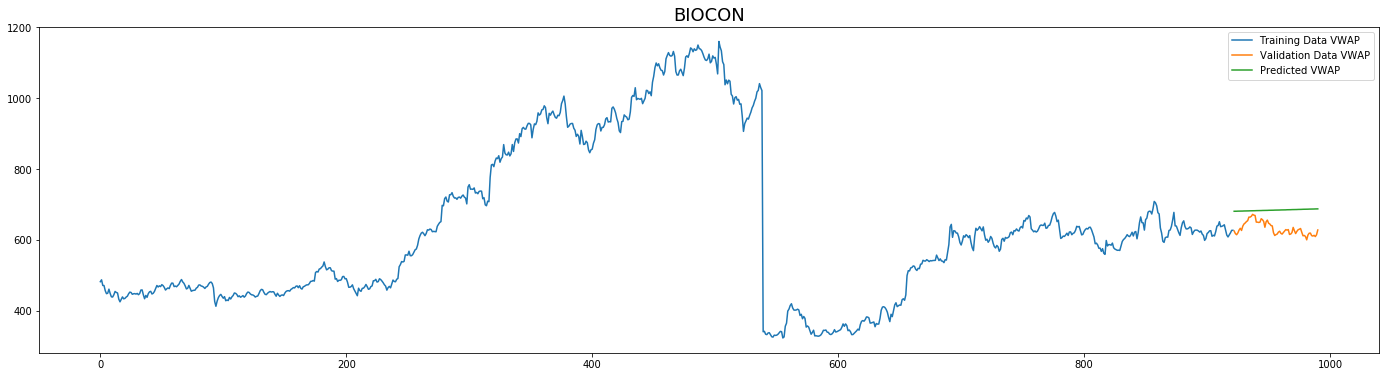

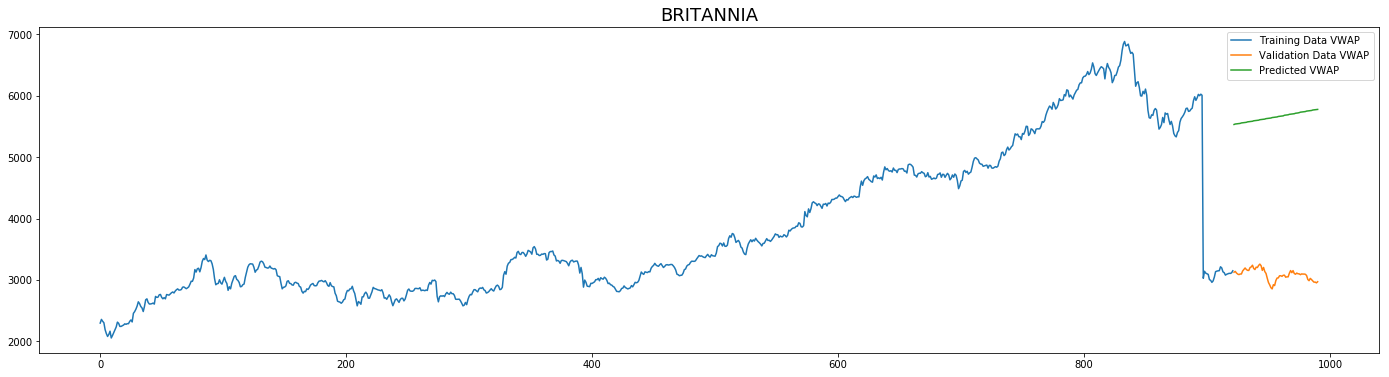

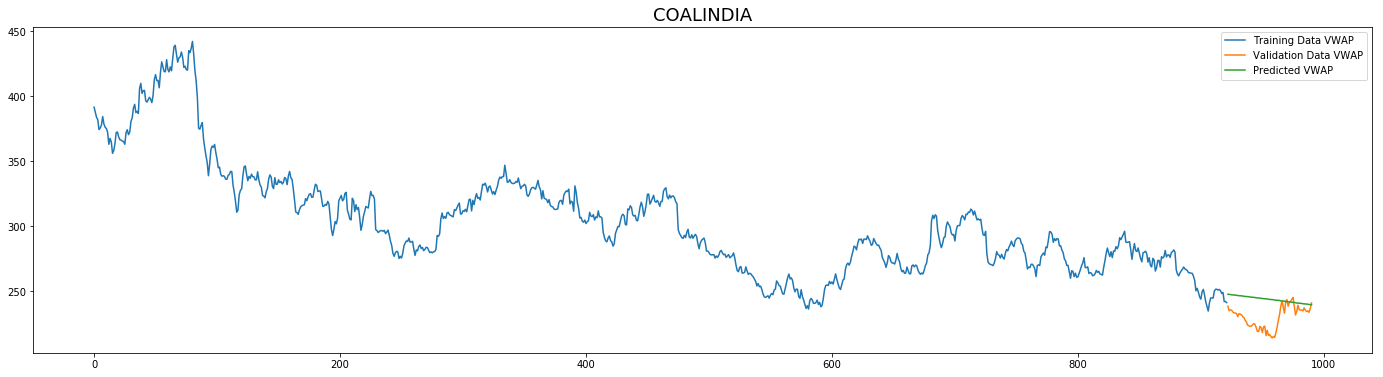

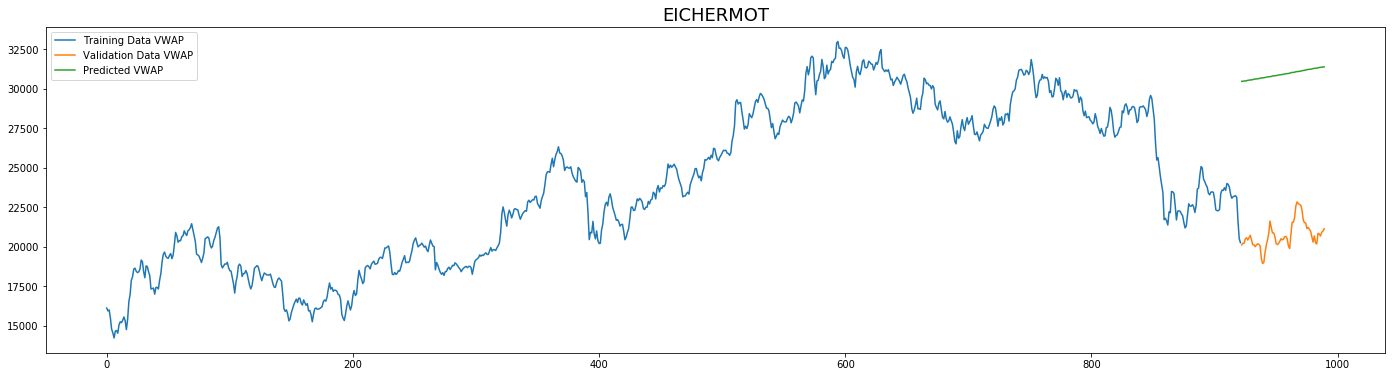

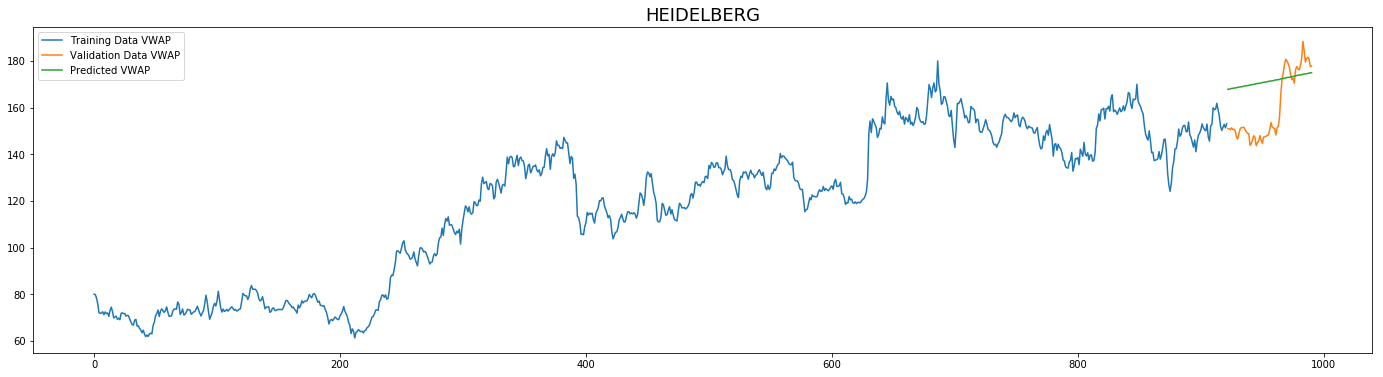

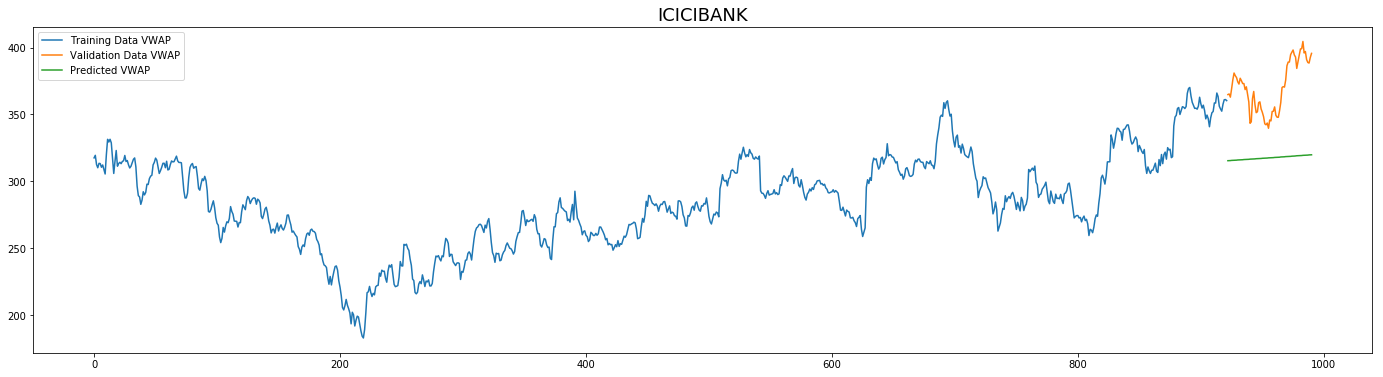

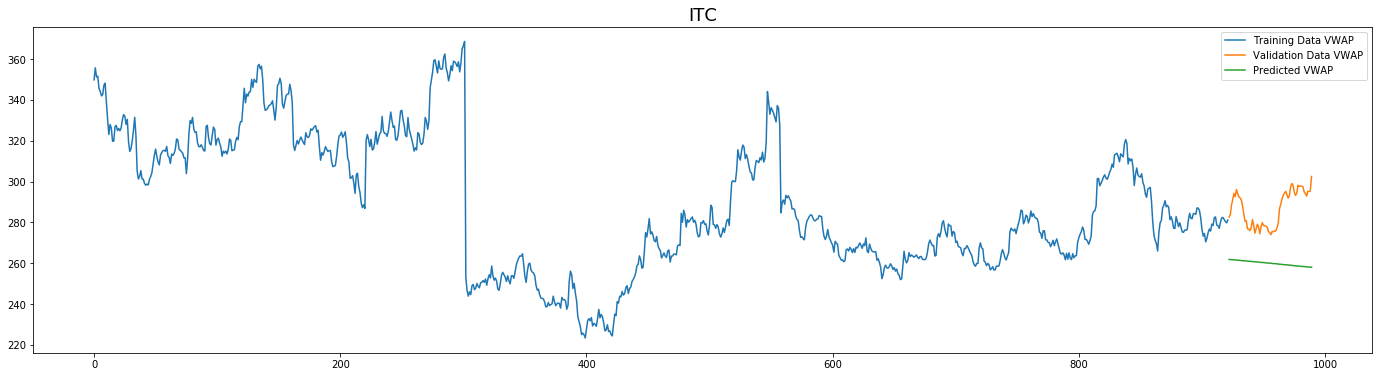

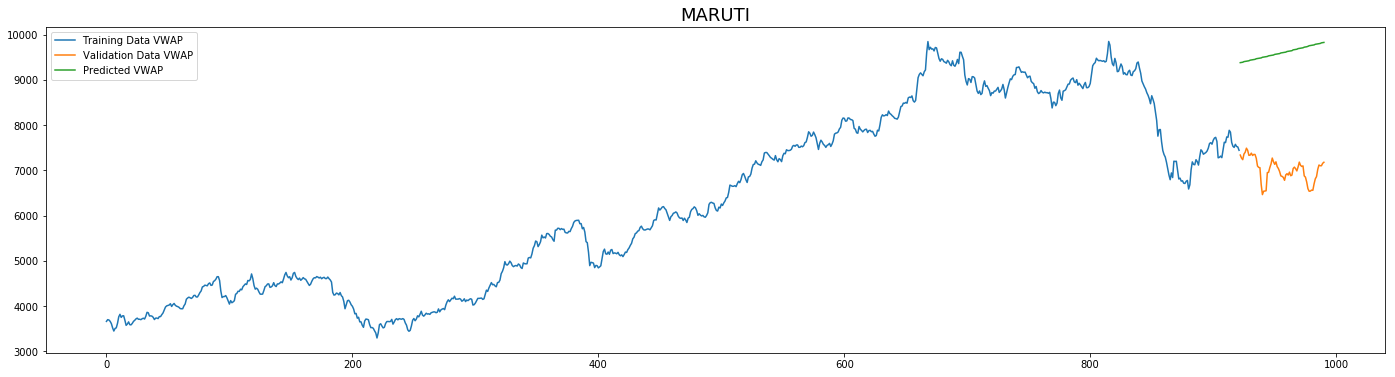

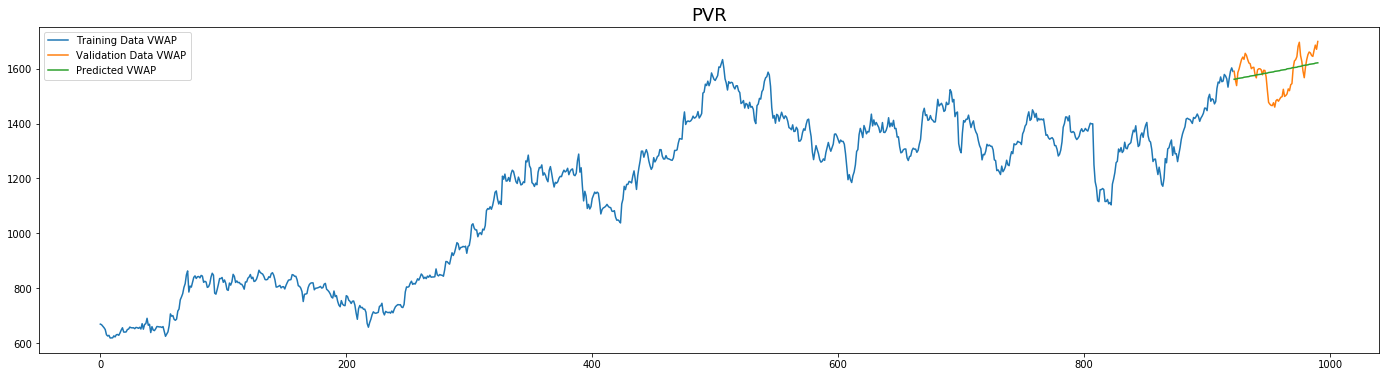

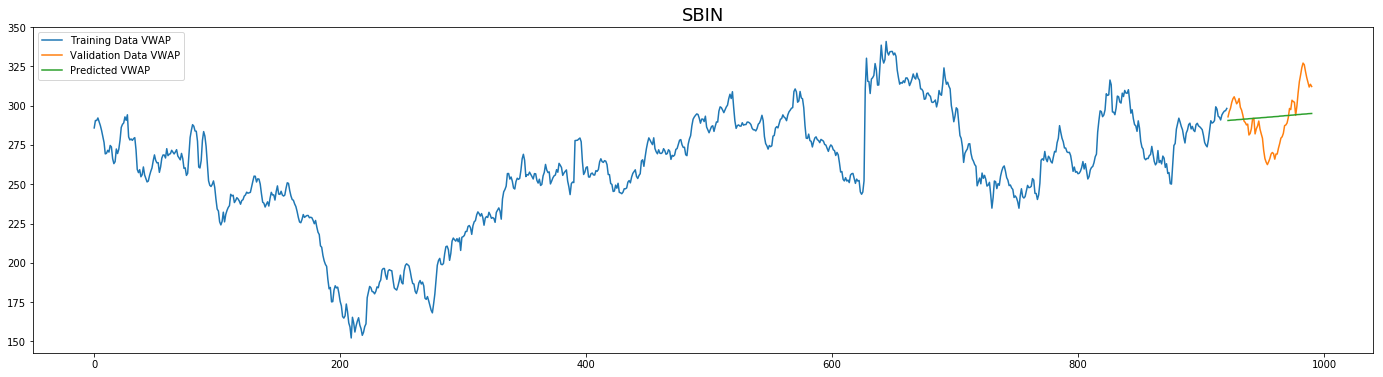

In [20]:
stockList = ['BIOCON', 'BRITANNIA', 'COALINDIA', 'EICHERMOT', 'HEIDELBERG', 'ICICIBANK', 'ITC', 'MARUTI', 'PVR', 'SBIN']

for stock in stockList:
    df = readCSV(stock)
    printSampleData(df)

    # Applying Arima Model
    print("Applying Linear Regression on: {}".format(stock))
    dataFrame = createDataFrame(df)
    linearRegressionModel(dataFrame, stock)
    

In [21]:
print(rmseStock)

{'BIOCON': 55.58505811353717, 'BRITANNIA': 2575.0836653923975, 'COALINDIA': 16.704796037442165, 'EICHERMOT': 10197.562716820206, 'HEIDELBERG': 17.056639504915, 'ICICIBANK': 55.67278577125814, 'ITC': 28.347311695161444, 'MARUTI': 2614.747443199646, 'PVR': 65.17325103410253, 'SBIN': 16.265850599880945}
